In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [233]:
df = pd.read_csv('/Users/saibalajikondapalli/Documents/Python Practice/Netflix-Movies-and-TV-Shows-Data-Analysis/netflix_titles.csv')
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


#### Initial Impressions of the Data
This details has all the details regarding the Title of the Movie / TV Show. Just looking at the first 10 rows of the data we can already see some missing values. 

In [234]:
print(df.shape)

df.info()

(8807, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


#### Data Details

This dataset contains 8807 rows and 12 columns. Out of these 12 columns one is int64 data type and the rest are object type.

In [235]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

#### Data Details

This data set has missing values in a couple of columns. `director` has 2634, `cast` has 825, `country` has 831, `date_added` has 10, `rating` has 4 and `duration` has 3 missing values.

In [236]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


The dataset contains information on movies released between the years 1925 and 2021. Here is a summary of the `release_year` column:

- **Count:** The dataset includes 8807 movies.
- **Mean:** The average release year of the movies is approximately 2014.
- **Standard Deviation:** The standard deviation is 8.82, indicating the variability in the release years of the movies.
- **Minimum:** The earliest movie in the dataset was released in 1925.
- **25th Percentile (Q1):** 25% of the movies were released before 2013.
- **Median (Q2):** 50% of the movies were released before 2017.
- **75th Percentile (Q3):** 75% of the movies were released before 2019.
- **Maximum:** The most recent movie in the dataset was released in 2021.

From this summary, we can observe that the majority of the movies in the dataset are relatively recent, with 50% of them released in or after 2017. A significant portion of the dataset consists of movies released in the last decade, with 75% of the movies being released in or after 2013 and 25% being released in or after 2019.


In [237]:
df = df.dropna()

In [238]:
df['date_added'] = df['date_added'].str.strip()

df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y')


df['day_added'] = df['date_added'].dt.day
df['month_added'] = df['date_added'].dt.strftime('%B')
df['year_added'] = df['date_added'].dt.year
df.drop(columns=['date_added'],inplace=True)
df.insert(6,'day_added', df.pop('day_added'))
df.insert(7, 'month_added', df.pop('month_added'))
df.insert(8, 'year_added', df.pop('year_added'))
df.head()

,show_id,type,title,director,cast,country,day_added,month_added,year_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",24,September,2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,24,September,2021,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,24,September,2021,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",23,September,2021,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,21,September,2021,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...


/var/folders/d5/0nkl4bqj2712httng60lv1cr0000gn/T/ipykernel_20571/2544744739.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day_added', y='count', data=day_counts, palette='viridis')


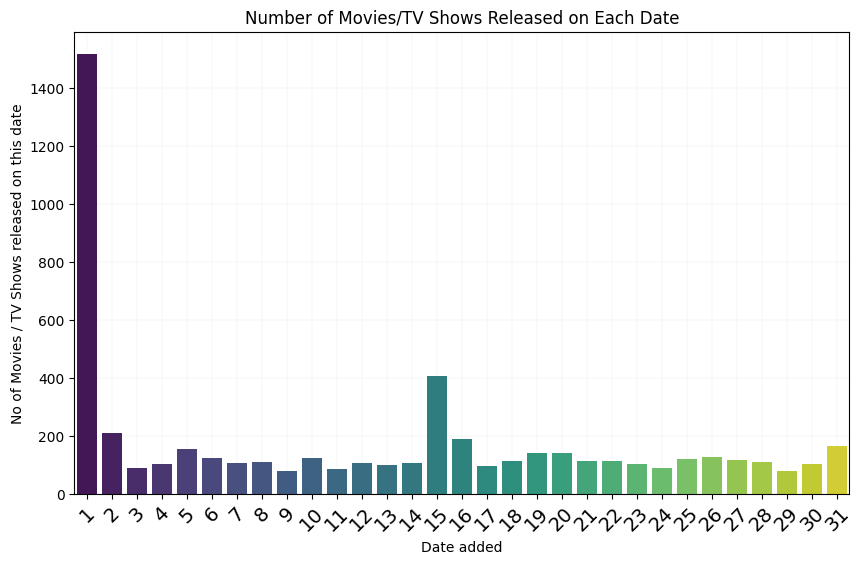

In [239]:
day_counts = df.groupby('day_added').size().reset_index(name='count')
day_counts = day_counts.sort_values('day_added')

plt.figure(figsize=(10,6))
sns.barplot(x='day_added', y='count', data=day_counts, palette='viridis')
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.1)
plt.gca().set_axisbelow(True) 
plt.gca().yaxis.grid(True)    
plt.gca().xaxis.grid(True)
plt.ylim(0, None) 
plt.title('Number of Movies/TV Shows Released on Each Date')
plt.xlabel('Date added')
plt.ylabel('No of Movies / TV Shows released on this date')
plt.xticks(rotation=45, fontsize=14)
plt.show()

In [240]:
month_added = df.groupby('month_added').size().reset_index(name='count')
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
month_added['month_added'] = pd.Categorical(month_added['month_added'], categories=month_order, ordered=True)
month_added = month_added.sort_values('month_added')
month_added

,month_added,count
4,January,489
3,February,341
7,March,469
0,April,471
8,May,368
6,June,415
5,July,464
1,August,449
11,September,427
10,October,491


/var/folders/d5/0nkl4bqj2712httng60lv1cr0000gn/T/ipykernel_20571/440090499.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month_added', y='count', data=month_added, palette='viridis')


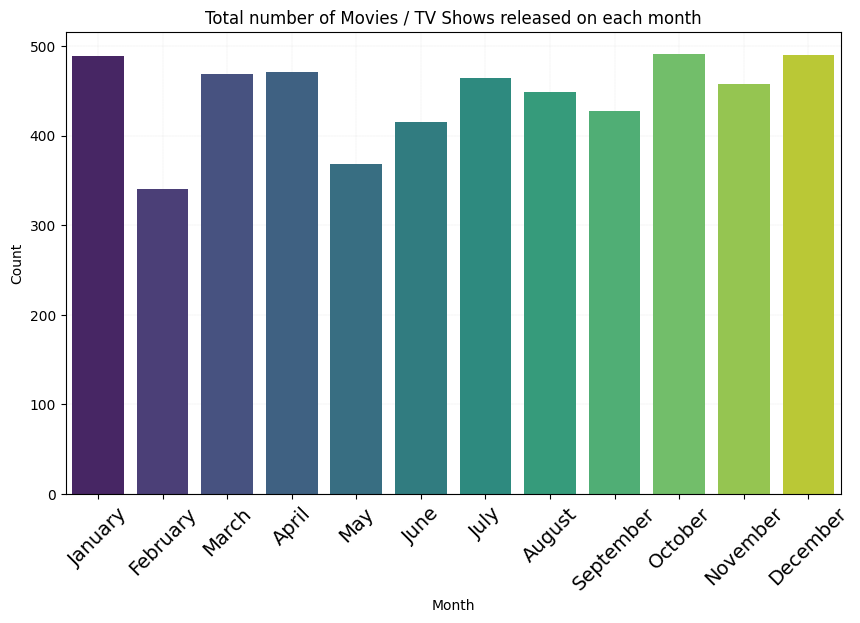

In [241]:
plt.figure(figsize=(10,6))
sns.barplot(x='month_added', y='count', data=month_added, palette='viridis')
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.1)
plt.gca().set_axisbelow(True) 
plt.gca().yaxis.grid(True)    
plt.gca().xaxis.grid(True)
plt.ylim(0, None) 
plt.title('Total number of Movies / TV Shows released on each month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45, fontsize=14)
plt.show()

In [242]:
year_added = df.groupby('year_added').size().reset_index(name='count')
year_added = year_added.sort_values('year_added')
year_added

,year_added,count
0,2008,1
1,2009,2
2,2010,1
3,2011,13
4,2012,3
5,2013,7
6,2014,14
7,2015,50
8,2016,202
9,2017,724


/var/folders/d5/0nkl4bqj2712httng60lv1cr0000gn/T/ipykernel_20571/2137804607.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='year_added', y='count', data=year_added, palette='viridis')


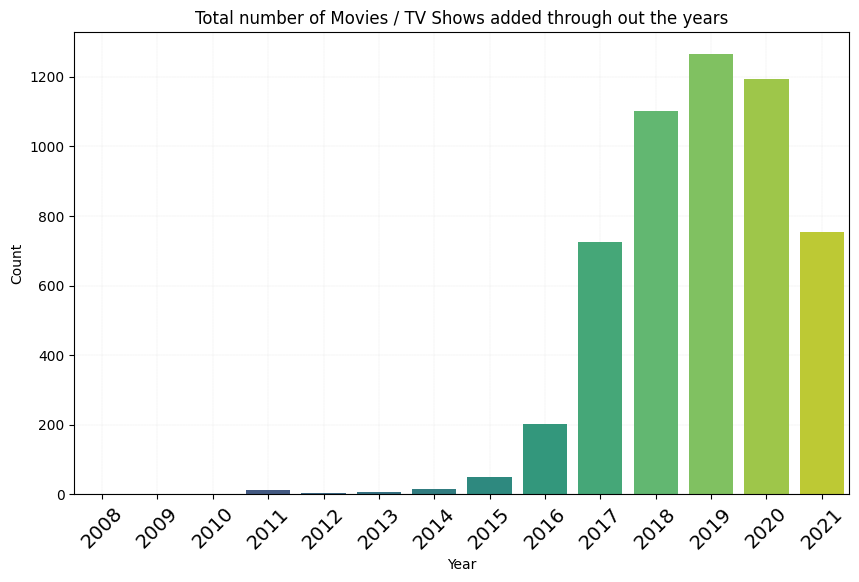

In [243]:
plt.figure(figsize=(10,6))
sns.barplot(x='year_added', y='count', data=year_added, palette='viridis')
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.1)
plt.gca().set_axisbelow(True) 
plt.gca().yaxis.grid(True)    
plt.gca().xaxis.grid(True)
plt.ylim(0, None)  
plt.title('Total number of Movies / TV Shows added through out the years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45, fontsize=14)
plt.show()

This shows the trend of adaptaion of internet for movies

In [244]:
year_released = df.groupby('release_year').size().reset_index(name='count')
year_released = year_released.sort_values('release_year')
year_released

,release_year,count
0,1942,1
1,1944,1
2,1945,1
3,1946,1
4,1947,1
...,...,...
67,2017,657
68,2018,648
69,2019,519
70,2020,442


/var/folders/d5/0nkl4bqj2712httng60lv1cr0000gn/T/ipykernel_20571/2673968643.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='release_year', y='count', data=year_released, palette='viridis')


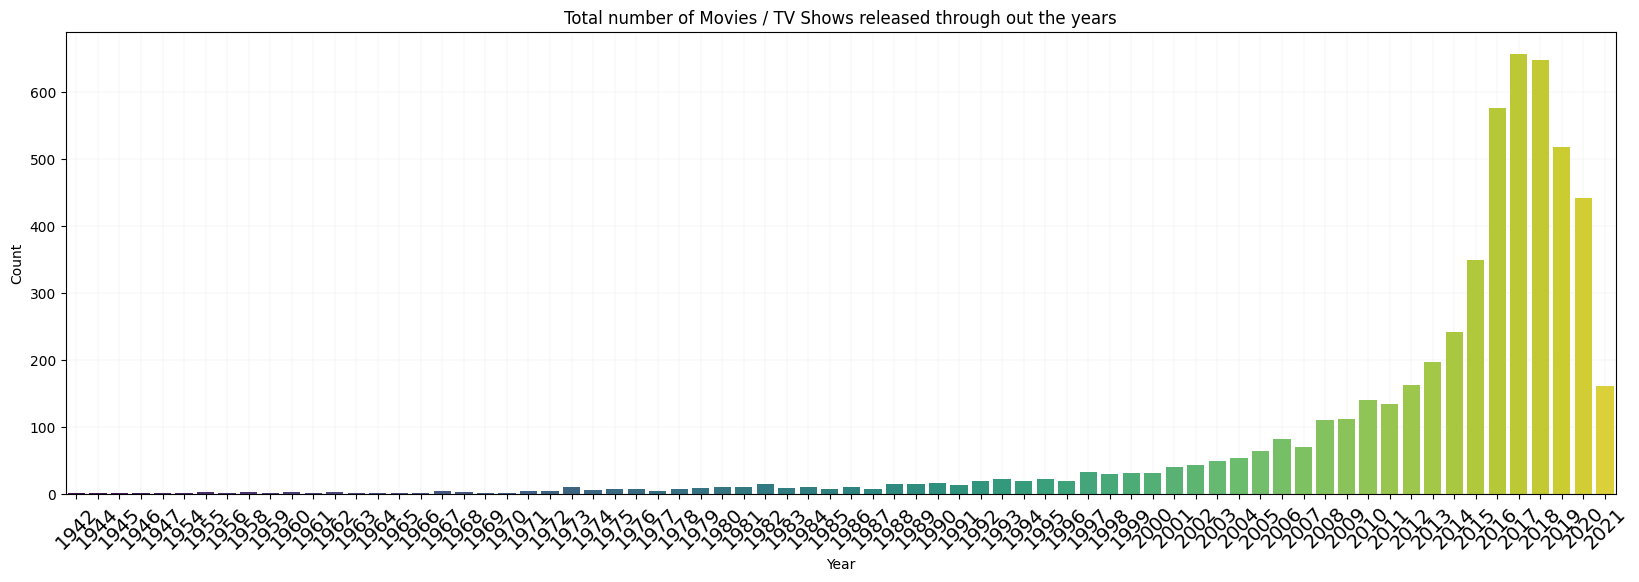

In [245]:
plt.figure(figsize=(20,6))
sns.barplot(x='release_year', y='count', data=year_released, palette='viridis')
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.1)
plt.gca().set_axisbelow(True) 
plt.gca().yaxis.grid(True)    
plt.gca().xaxis.grid(True)
plt.ylim(0, None)  
plt.title('Total number of Movies / TV Shows released through out the years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45, fontsize=14)
plt.show()

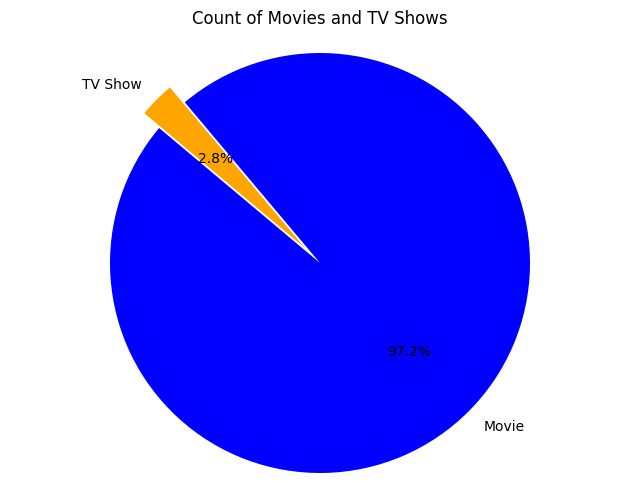

In [268]:
types = df['type'].value_counts()

explode = [0.1 if i == 0 else 0 for i in range(len(types))]

plt.figure(figsize=(8,6))
plt.pie(types, labels=types.index, autopct='%1.1f%%',colors=['blue','orange'], startangle=140, explode= explode)
plt.title('Count of Movies and TV Shows')
plt.axis('equal')
plt.show()

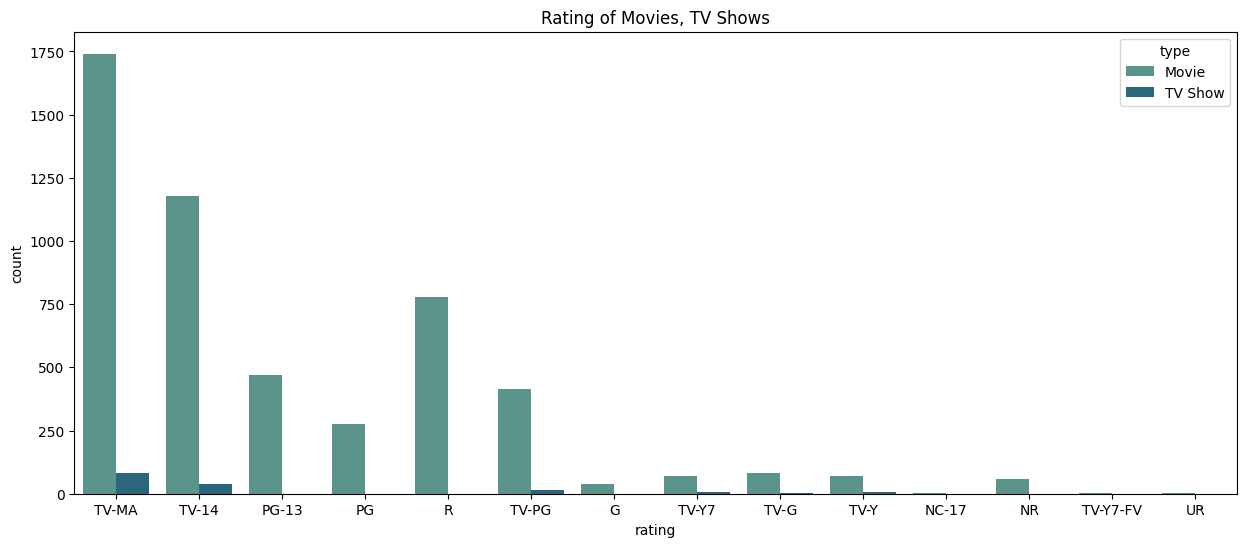

In [259]:
plt.figure(figsize=(15,6))
sns.countplot(x='rating', hue='type', data=df, palette='crest')
plt.title('Rating of Movies, TV Shows')
plt.show()

/var/folders/d5/0nkl4bqj2712httng60lv1cr0000gn/T/ipykernel_20571/559233721.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=countries.index, y=countries.values, palette='crest')


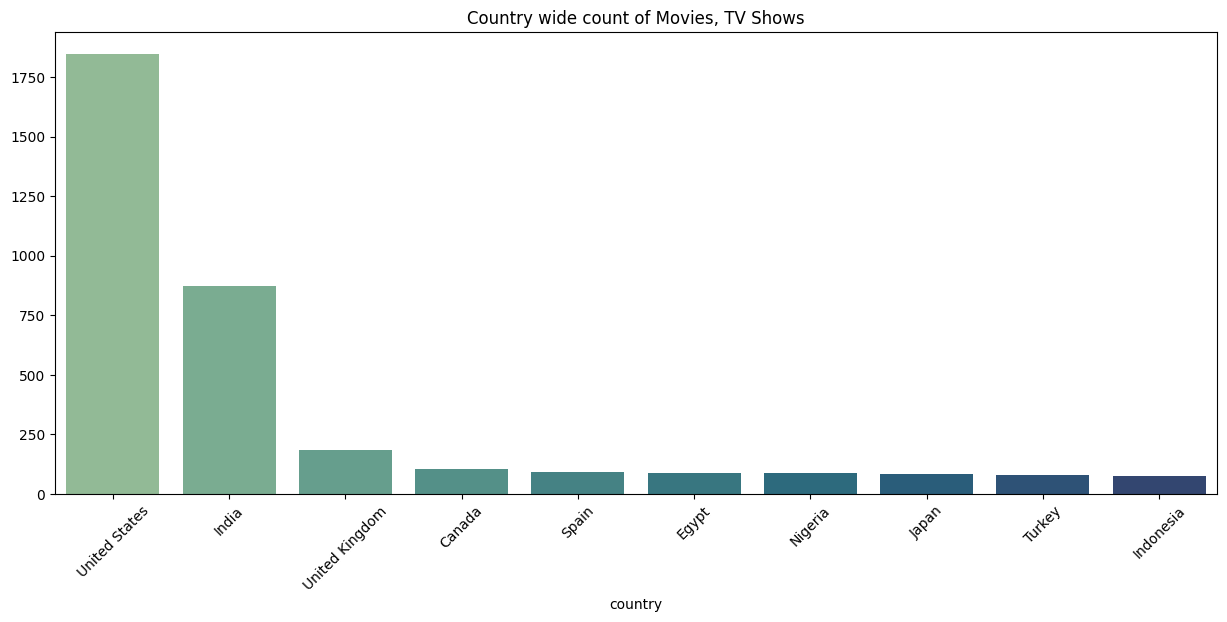

In [286]:
countries = df['country'].value_counts()
countries = countries.head(10)
countries


plt.figure(figsize=(15,6))
sns.barplot(x=countries.index, y=countries.values, palette='crest')
plt.title('Country wide count of Movies, TV Shows')
plt.xticks(rotation=45)
plt.show()

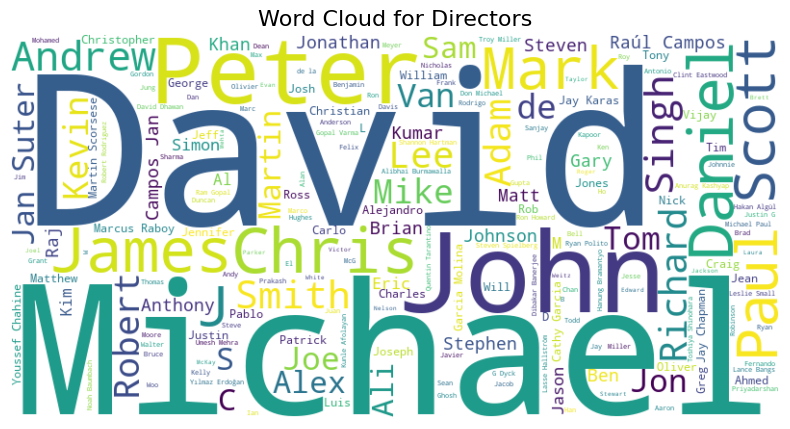

In [276]:
from wordcloud import WordCloud

text = " ".join(director for director in df['director'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Directors', fontsize=16)
plt.show()

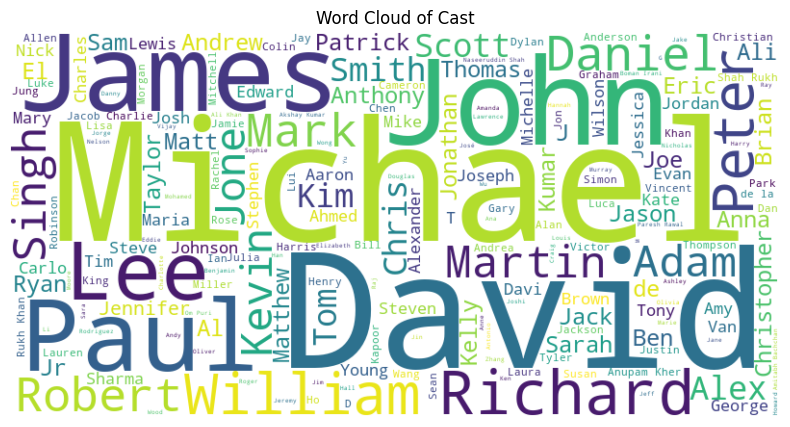

In [279]:
text_2 = ' '.join(cast for cast in df['cast'])

wordcloud_2 = WordCloud(width=800, height=400, background_color='white').generate(text_2)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_2, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Cast')
plt.show()